In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[15,7]

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/Prediction%20of%20Insurance%20Charges/insurance.csv")
df.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df = df.drop("index", axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df["children"] = df["children"].astype("object")

In [8]:
num = df.select_dtypes(include=np.number).columns
num

Index(['age', 'bmi', 'charges'], dtype='object')

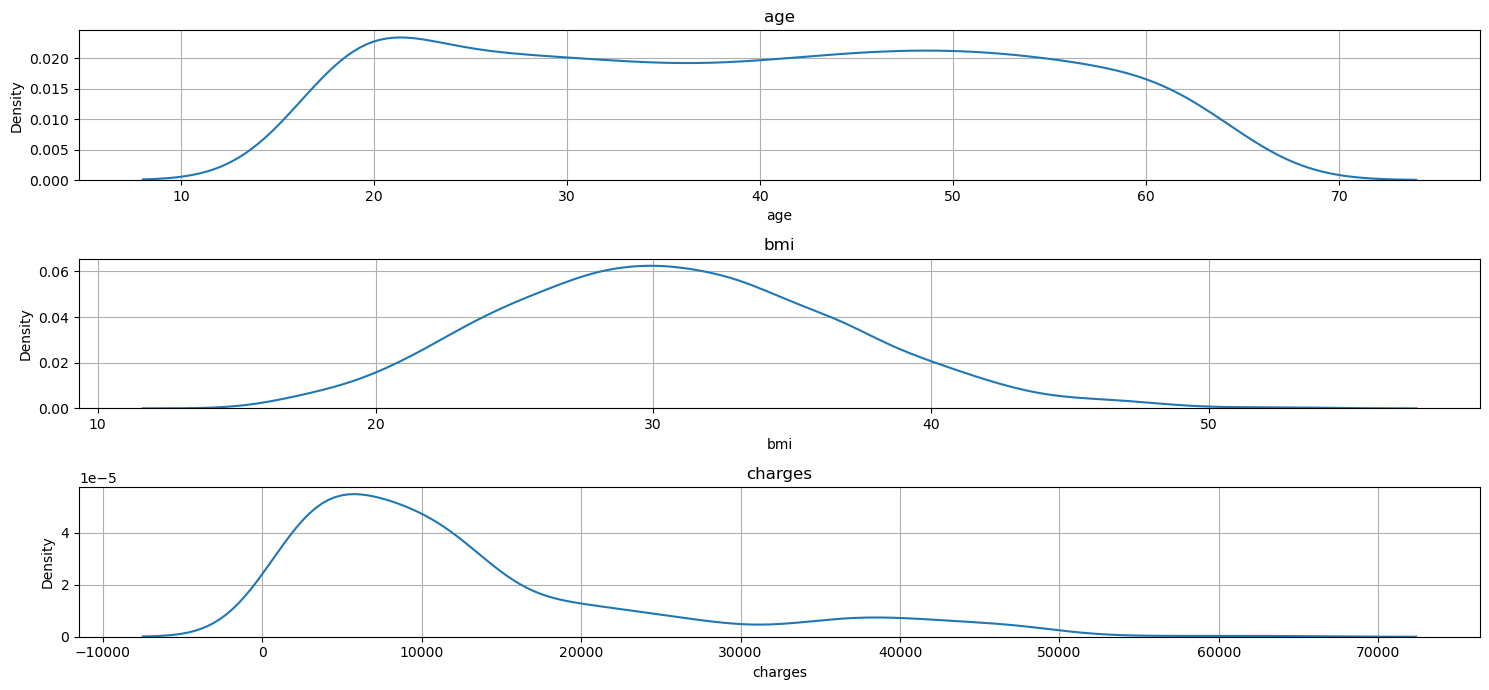

In [9]:
r=3
c=1
it=1
for i in num:
    plt.subplot(r,c,it)
    sns.distplot(df.loc[:,i],hist=False)
    plt.grid()
    plt.title(i)
    it+=1
plt.tight_layout()
plt.show()

In [10]:
cat = df.select_dtypes(include="object").columns
cat

Index(['sex', 'children', 'smoker', 'region'], dtype='object')

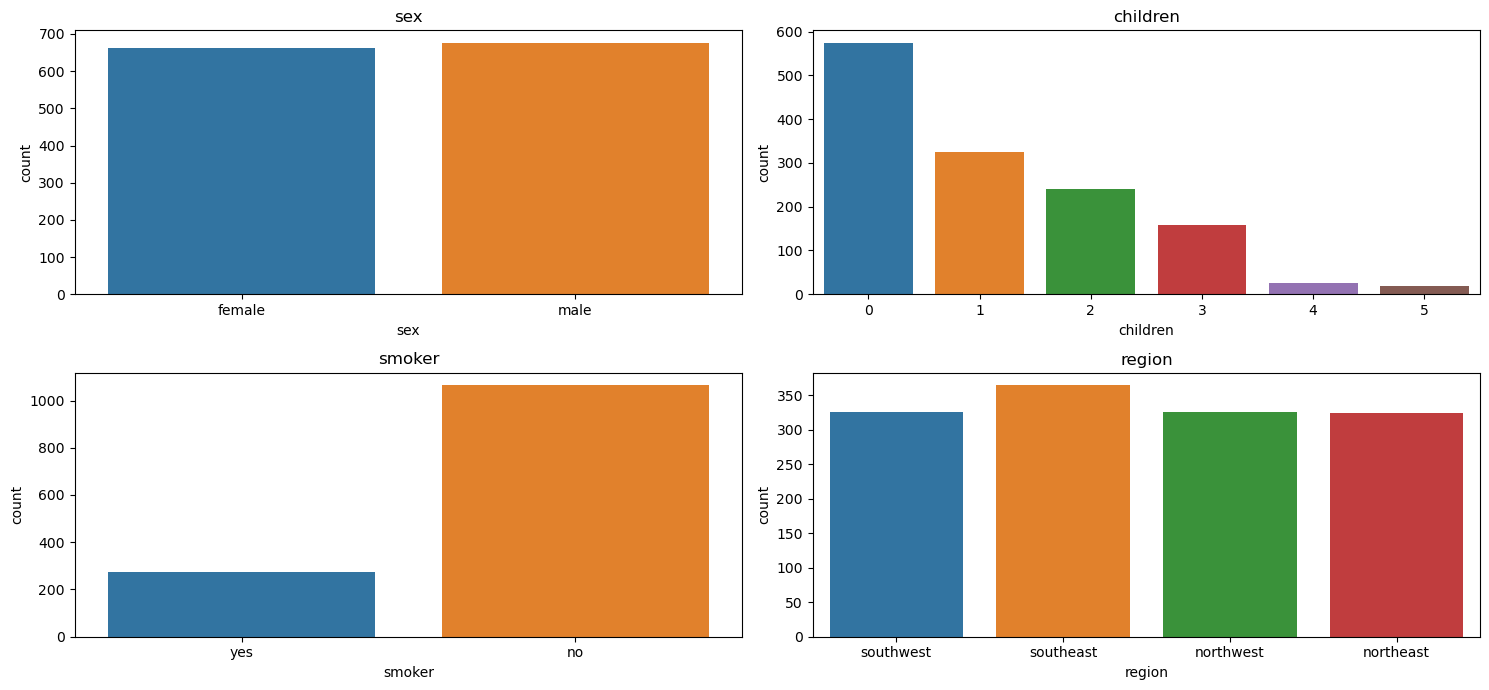

In [11]:
r=2
c=2
it=1
for i in cat:
    plt.subplot(r,c,it)
    sns.countplot(x=df.loc[:,i])
    plt.title(i)
    it+=1
plt.tight_layout()
plt.show()

In [12]:
y=df["charges"]
x=df.drop("charges", axis=1)

In [13]:
x_cat = x.select_dtypes(include="object")
x_cat.head()

,sex,children,smoker,region
0,female,0,yes,southwest
1,male,1,no,southeast
2,male,3,no,southeast
3,male,0,no,northwest
4,male,0,no,northwest


In [14]:
x_cat = pd.get_dummies(x_cat, drop_first=True)
x_cat

,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,0,0,0,0,0,1,0,0,1
1,1,1,0,0,0,0,0,0,1,0
2,1,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,1,0,0,1,0,0,0,1,0,0
1334,0,0,0,0,0,0,0,0,0,0
1335,0,0,0,0,0,0,0,0,1,0
1336,0,0,0,0,0,0,0,0,0,1


In [15]:
x_num = x.select_dtypes(include=np.number)
x_num.head()

,age,bmi
0,19,27.900
1,18,33.770
2,28,33.000
3,33,22.705
4,32,28.880


In [16]:
x = pd.concat([x_cat, x_num], axis=1)
x.head()

,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest,age,bmi
0,0,0,0,0,0,0,1,0,0,1,19,27.900
1,1,1,0,0,0,0,0,0,1,0,18,33.770
2,1,0,0,1,0,0,0,0,1,0,28,33.000
3,1,0,0,0,0,0,0,1,0,0,33,22.705
4,1,0,0,0,0,0,0,1,0,0,32,28.880


In [17]:
xc = sm.add_constant(x)
xc.head()

,const,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest,age,bmi
0,1.0,0,0,0,0,0,0,1,0,0,1,19,27.900
1,1.0,1,1,0,0,0,0,0,0,1,0,18,33.770
2,1.0,1,0,0,1,0,0,0,0,1,0,28,33.000
3,1.0,1,0,0,0,0,0,0,1,0,0,33,22.705
4,1.0,1,0,0,0,0,0,0,1,0,0,32,28.880


In [18]:
model = sm.OLS(y,xc).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     334.7
Date:                Wed, 09 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:59:46   Log-Likelihood:                -13545.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1325   BIC:                         2.718e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.193e+04    993.657  

In [19]:

xc=sm.add_constant(x)
cols=list(xc.columns)
while len(cols)>1:
    xc=xc[cols]
    model=sm.OLS(y,xc).fit()
    p=model.pvalues
    pmax=max(p)
    pid=p.idxmax()           # index of series with highest value
    if pmax>0.05:
        cols.remove(pid)
        print(pid,pmax)
    else:
        break
cols

sex_male 0.7002538339572062
children_5 0.44722730573677805
region_northwest 0.41906920981193674
children_1 0.4014224682243248
children_3 0.1316129461244719
region_southwest 0.0676752046402193
region_southeast 0.131860613499702


['const', 'children_2', 'children_4', 'smoker_yes', 'age', 'bmi']

In [20]:
xc = xc[['const', 'children_2', 'children_4', 'smoker_yes', 'age', 'bmi']]
xc.head()

,const,children_2,children_4,smoker_yes,age,bmi
0,1.0,0,0,1,19,27.900
1,1.0,0,0,0,18,33.770
2,1.0,0,0,0,28,33.000
3,1.0,0,0,0,33,22.705
4,1.0,0,0,0,32,28.880


In [21]:
x = x[['children_2', 'children_4', 'smoker_yes', 'age', 'bmi']]
x.head()

,children_2,children_4,smoker_yes,age,bmi
0,0,0,1,19,27.900
1,0,0,0,18,33.770
2,0,0,0,28,33.000
3,0,0,0,33,22.705
4,0,0,0,32,28.880


In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=42)
print("The shape of xtrain is: ",xtrain.shape)
print("The shape of xtest is: ",xtest.shape)
print("The shape of ytrain is: ",ytrain.shape)
print("The shape of ytest is: ",ytest.shape)

The shape of xtrain is:  (936, 5)
The shape of xtest is:  (402, 5)
The shape of ytrain is:  (936,)
The shape of ytest is:  (402,)


In [23]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
knn = KNeighborsRegressor()

model_list = [lr,dt,rf,knn]

train_r2 = []
test_r2 = []
train_rmse = []
test_rmse = []

for i in model_list:
    i_model = i.fit(xtrain,ytrain)
    ytrain_pred = i_model.predict(xtrain)
    ytest_pred = i_model.predict(xtest)
    train_r2.append(r2_score(ytrain,ytrain_pred))
    test_r2.append(r2_score(ytest,ytest_pred))
    train_rmse.append(np.sqrt(mean_squared_error(ytrain,ytrain_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(ytest,ytest_pred)))

In [24]:
train_r2

[0.7429459842193479,
 0.9990052502592494,
 0.9720963230716542,
 0.46474961873751475]

In [26]:
train_rmse

[6135.983106432419, 381.7059028391528, 2021.6346670025719, 8854.222910913395]

In [27]:
test_r2

[0.7653982837813329, 0.7492236102156138, 0.837646050150964, 0.2234551658035836]

In [29]:
test_rmse

[5865.0076105096605, 6063.820131593881, 4879.040431323823, 10670.536484301454]

In [30]:
train_score = pd.DataFrame({'models':model_list,'r2_train':train_r2,'RMSE_train':train_rmse})
train_score

,models,r2_train,RMSE_train
0,LinearRegression(),0.742946,6135.983106
1,DecisionTreeRegressor(),0.999005,381.705903
2,"(DecisionTreeRegressor(max_features=1.0, rando...",0.972096,2021.634667
3,KNeighborsRegressor(),0.464750,8854.222911


In [31]:
test_score = pd.DataFrame({'models':model_list,'r2_test':test_r2,'RMSE_test':test_rmse})
test_score

,models,r2_test,RMSE_test
0,LinearRegression(),0.765398,5865.007611
1,DecisionTreeRegressor(),0.749224,6063.820132
2,"(DecisionTreeRegressor(max_features=1.0, rando...",0.837646,4879.040431
3,KNeighborsRegressor(),0.223455,10670.536484


In [32]:
lr.coef_

array([ 1279.61940437,  3900.02912641, 23660.59592793,   264.45926725,
         331.85242757])

In [33]:
lr.intercept_

-12360.471547355191

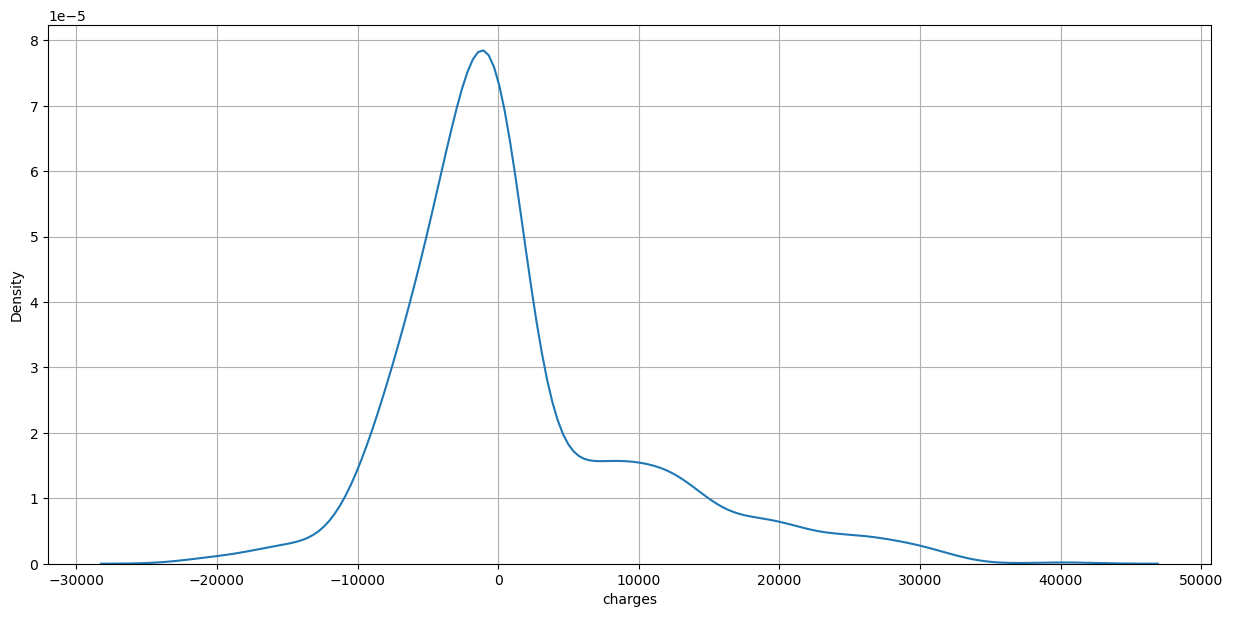

In [34]:
sns.distplot(ytrain-ytrain_pred,hist=False)
plt.grid()
plt.show()

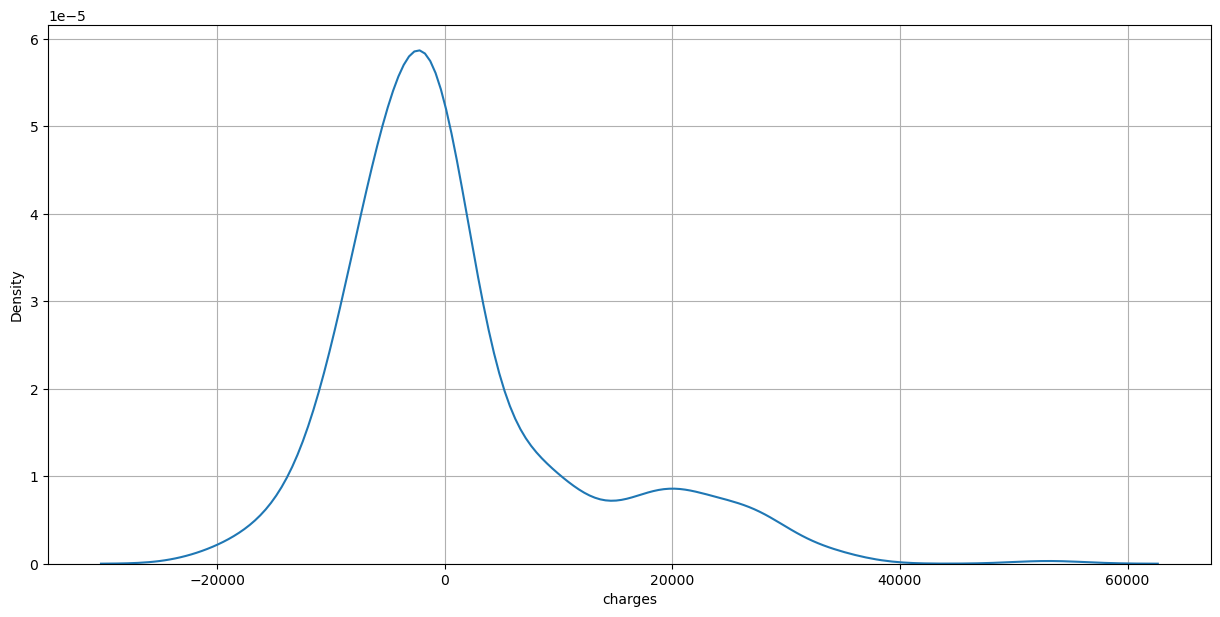

In [35]:
sns.distplot(ytest-ytest_pred,hist=False)
plt.grid()
plt.show()

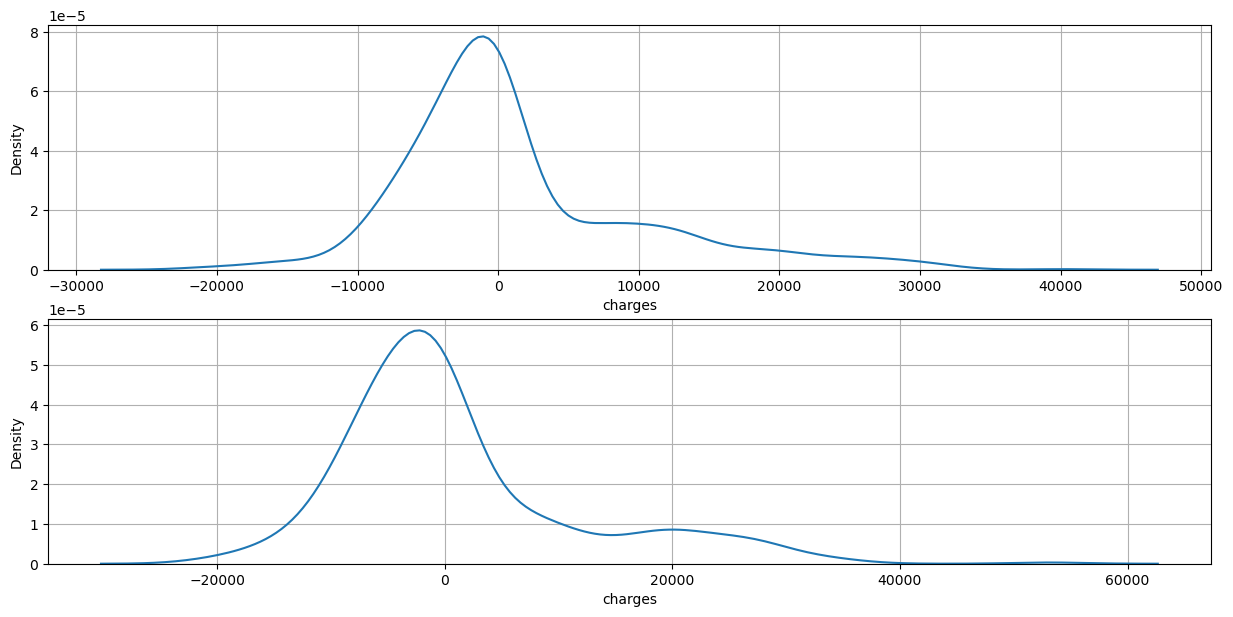

In [36]:
plt.subplot(2,1,1)
sns.distplot(ytrain-ytrain_pred,hist=False)
plt.grid()
plt.subplot(2,1,2)
sns.distplot(ytest-ytest_pred,hist=False)
plt.grid()
plt.show()